# Plot AUC over epoch

(with prepared values)

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use([hep.style.ROOT, hep.style.fira, hep.style.firamath])
import time
import gc

In [106]:
basic_paths = {}
adv_paths = {}

In [107]:
basic = {'BvL_raw': None,'BvL_eps0.01': None,'BvL_eps0.02': None,'BvL_sigma0.01': None,'BvL_sigma0.02': None}
adv = {'BvL_raw': None,'BvL_eps0.01': None,'BvL_eps0.02': None,'BvL_sigma0.01': None,'BvL_sigma0.02': None}

In [108]:
setups = ['BvL_raw','BvL_eps0.01','BvL_eps0.02','BvL_sigma0.01','BvL_sigma0.02']
for setup in setups:
    b_paths = []
    a_paths = []
    for index in range(1,200,10):
        b_paths.append(f'/home/um106329/aisafety/june_21/evaluate/auc/BvL/[\'_ptetaflavloss_focalloss_gamma25.0\']_e{index},{index+9}_s[\'{setup}\']_13283070_278_0.001_-1.npy')
        a_paths.append(f'/home/um106329/aisafety/june_21/evaluate/auc/BvL/[\'_ptetaflavloss_focalloss_gamma25.0_adv_tr_eps0.01\']_e{index},{index+9}_s[\'{setup}\']_13283070_278_0.001_-1.npy')
    basic_paths[setup] = b_paths
    adv_paths[setup] = a_paths

In [109]:
basic['BvL_raw'] = np.concatenate([np.load(p) for p in basic_paths['BvL_raw']]).flatten()
adv['BvL_raw'] = np.concatenate([np.load(p) for p in adv_paths['BvL_raw']]).flatten()
basic['BvL_eps0.01'] = np.concatenate([np.load(p) for p in basic_paths['BvL_eps0.01']]).flatten()
adv['BvL_eps0.01'] = np.concatenate([np.load(p) for p in adv_paths['BvL_eps0.01']]).flatten()
basic['BvL_eps0.02'] = np.concatenate([np.load(p) for p in basic_paths['BvL_eps0.02']]).flatten()
adv['BvL_eps0.02'] = np.concatenate([np.load(p) for p in adv_paths['BvL_eps0.02']]).flatten()
basic['BvL_sigma0.01'] = np.concatenate([np.load(p) for p in basic_paths['BvL_sigma0.01']]).flatten()
adv['BvL_sigma0.01'] = np.concatenate([np.load(p) for p in adv_paths['BvL_sigma0.01']]).flatten()
basic['BvL_sigma0.02'] = np.concatenate([np.load(p) for p in basic_paths['BvL_sigma0.02']]).flatten()
adv['BvL_sigma0.02'] = np.concatenate([np.load(p) for p in adv_paths['BvL_sigma0.02']]).flatten()

#### Examples

In [37]:
basic['BvL_raw']

array([0.92793581, 0.93489889, 0.93751951, 0.93926224, 0.94026967,
       0.94091142, 0.94136391, 0.94205944, 0.94232442, 0.94240258,
       0.94292633, 0.94325382, 0.94336709, 0.94360256, 0.94370561,
       0.94404046, 0.94427296, 0.94410934, 0.94432189, 0.94446092,
       0.94453445, 0.94465539, 0.94481581, 0.94492923, 0.94517757,
       0.94487434, 0.94502673, 0.94514205, 0.94520502, 0.94508014,
       0.9453245 , 0.94558806, 0.94541239, 0.94561393, 0.94542234,
       0.94553542, 0.94552001, 0.94572418, 0.94579413, 0.94574208,
       0.9458518 , 0.94568669, 0.94588155, 0.94588783, 0.94596929,
       0.94591262, 0.94589282, 0.94601462, 0.94601992, 0.94597038,
       0.94591148, 0.94617065, 0.94610493, 0.94627428, 0.94632818,
       0.94632715, 0.94613709, 0.9460972 , 0.9460592 , 0.94626809,
       0.94622543, 0.94631275, 0.94631089, 0.94632501, 0.94649303,
       0.9462984 , 0.9463088 , 0.94642487, 0.94638262, 0.94662171,
       0.94653021, 0.94657791, 0.94660483, 0.94661929, 0.94652

In [38]:
adv['BvL_raw']

array([0.92819422, 0.93413264, 0.93684142, 0.93852799, 0.93960366,
       0.94015115, 0.94069077, 0.94147782, 0.94162426, 0.94201608,
       0.94244198, 0.94260874, 0.94279035, 0.94307208, 0.9433111 ,
       0.94374575, 0.94374089, 0.94374818, 0.9438615 , 0.9440371 ,
       0.94390559, 0.94413633, 0.94435512, 0.94447188, 0.94454919,
       0.94453046, 0.94471818, 0.9445857 , 0.94481261, 0.94457099,
       0.94487444, 0.94503076, 0.94500594, 0.94486158, 0.94499988,
       0.94507004, 0.94503239, 0.94518506, 0.94529032, 0.94522565,
       0.94522984, 0.94540923, 0.94545119, 0.94555688, 0.94523803,
       0.94552003, 0.94529546, 0.94562992, 0.94552251, 0.94570364,
       0.94557279, 0.94566252, 0.94556084, 0.94566636, 0.94561993,
       0.94582142, 0.94582557, 0.94593879, 0.94604525, 0.94586228,
       0.94601615, 0.94586373, 0.94597492, 0.94598266, 0.9459022 ,
       0.94601175, 0.94615839, 0.9460961 , 0.94615235, 0.94614939,
       0.94624998, 0.94614178, 0.9461976 , 0.94615935, 0.94617

## Plot
### Basic

In [73]:
epsilons = [0.01,0.02]
at_epoch = np.arange(1,201)

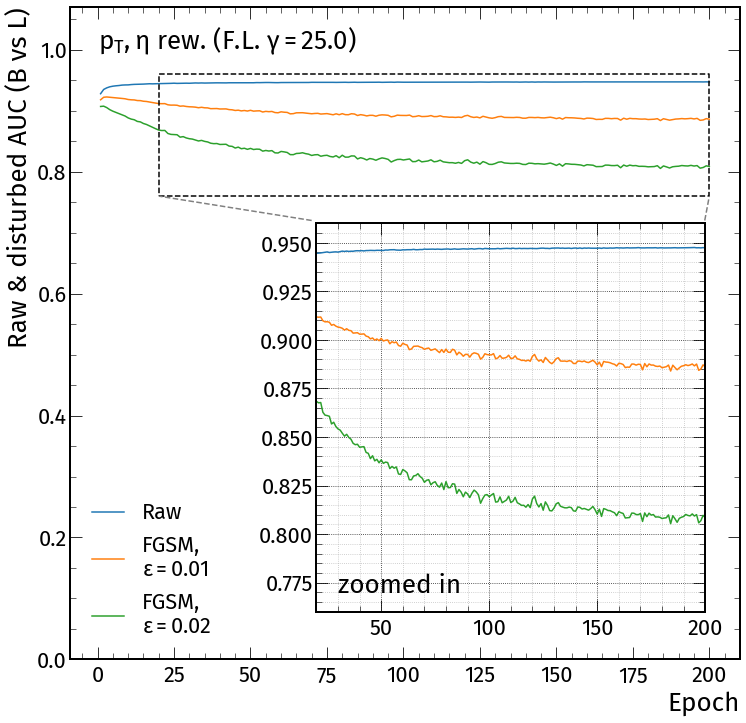

15707

In [88]:
plt.figure(5,[12,12])
plt.xlabel('Epoch')
plt.ylabel('Raw & disturbed AUC (B vs L)')
plt.plot(at_epoch,basic['BvL_raw'],label='Raw')
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,basic['BvL_eps0.01'],label=f'FGSM,\n$\epsilon={s}$')
    else:
        plt.plot(at_epoch,basic['BvL_eps0.02'],label=f'FGSM,\n$\epsilon={s}$')
plt.legend()
#plt.xlim([20,120])
plt.ylim([0.0,1.07])
plt.text(0,1,r'$p_T, \eta$ rew. (F.L. $\gamma=$'+f'25.0)')
plt.plot([20,200,200,20,20],[0.76,0.76,0.96,0.96,0.76],'--',color='black')
plt.plot([70,20],[0.72,0.76],'--',color='grey')
plt.plot([198.5,200],[0.72,0.76],'--',color='grey')
ax = plt.axes([.41, .18, .45, .45])
plt.plot(at_epoch,basic['BvL_raw'],label='Raw')
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,basic['BvL_eps0.01'],label=f'FGSM,\n$\epsilon={s}$')
    else:
        plt.plot(at_epoch,basic['BvL_eps0.02'],label=f'FGSM,\n$\epsilon={s}$')
plt.xlim([20,200])
plt.ylim([0.76,0.96])
plt.text(30,0.77,'zoomed in')

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
plt.savefig(f'auc/BvL/basic_auc_fgsm_001_002.svg', bbox_inches='tight')
plt.savefig(f'auc/BvL/basic_auc_fgsm_001_002.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)

### Adversarial

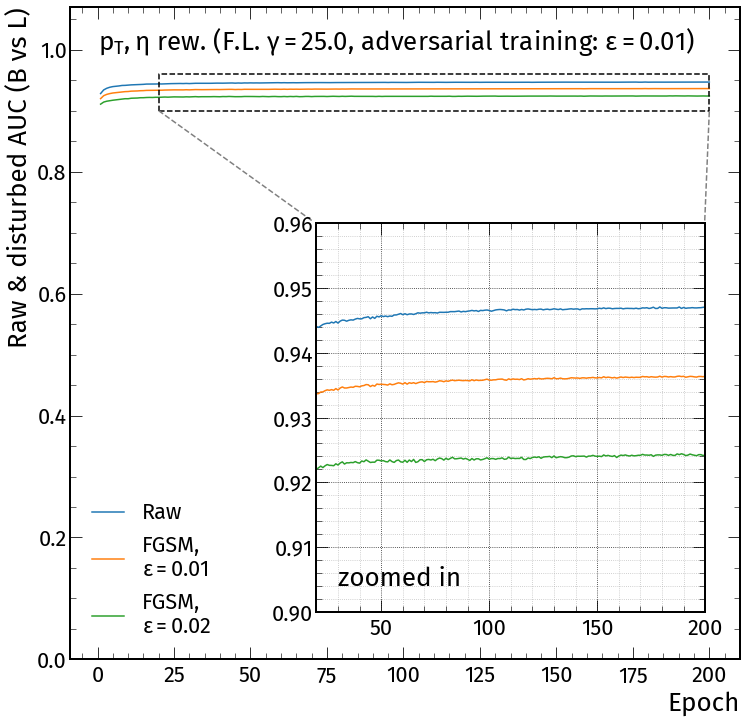

17307

In [89]:
plt.figure(5,[12,12])
plt.xlabel('Epoch')
plt.ylabel('Raw & disturbed AUC (B vs L)')
plt.plot(at_epoch,adv['BvL_raw'],label='Raw')
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,adv['BvL_eps0.01'],label=f'FGSM,\n$\epsilon={s}$')
    else:
        plt.plot(at_epoch,adv['BvL_eps0.02'],label=f'FGSM,\n$\epsilon={s}$')
plt.legend()
#plt.xlim([20,120])
plt.ylim([0.0,1.07])
plt.text(0,1,r'$p_T, \eta$ rew. (F.L. $\gamma=$'+f'25.0, adversarial training: $\epsilon=$'+f'0.01)')
plt.plot([20,200,200,20,20],[0.90,0.90,0.96,0.96,0.90],'--',color='black')
plt.plot([70,20],[0.72,0.90],'--',color='grey')
plt.plot([198.5,200],[0.72,0.90],'--',color='grey')
ax = plt.axes([.41, .18, .45, .45])
plt.plot(at_epoch,adv['BvL_raw'],label='Raw')
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,adv['BvL_eps0.01'],label=f'FGSM,\n$\epsilon={s}$')
    else:
        plt.plot(at_epoch,adv['BvL_eps0.02'],label=f'FGSM,\n$\epsilon={s}$')
plt.xlim([20,200])
plt.ylim([0.90,0.96])
plt.text(30,0.904,'zoomed in')

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
plt.savefig(f'auc/BvL/adv_auc_fgsm_001_002.svg', bbox_inches='tight')
plt.savefig(f'auc/BvL/adv_auc_fgsm_001_002.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)

### Ratios

### Basic

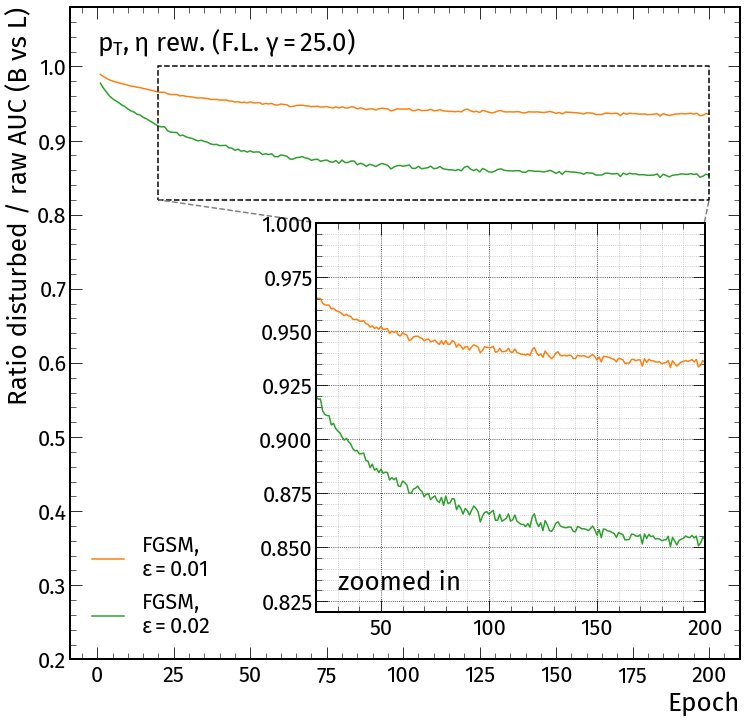

17880

In [102]:
plt.figure(5,[12,12])
plt.xlabel('Epoch')
plt.ylabel('Ratio disturbed / raw AUC (B vs L)')
#plt.plot(at_epoch,basic['BvL_raw'],label='Raw')
plt.plot([],[])
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,basic['BvL_eps0.01']/basic['BvL_raw'],label=f'FGSM,\n$\epsilon={s}$')
    else:
        plt.plot(at_epoch,basic['BvL_eps0.02']/basic['BvL_raw'],label=f'FGSM,\n$\epsilon={s}$')
plt.legend()
#plt.xlim([20,120])
plt.ylim([0.2,1.08])
plt.text(0,1.02,r'$p_T, \eta$ rew. (F.L. $\gamma=$'+f'25.0)')
plt.plot([20,200,200,20,20],[0.82,0.82,1,1,0.82],'--',color='black')
plt.plot([70,20],[0.79,0.82],'--',color='grey')
plt.plot([198.5,200],[0.79,0.82],'--',color='grey')
ax = plt.axes([.41, .18, .45, .45])
#plt.plot(at_epoch,basic['BvL_raw'],label='Raw')
plt.plot([],[])
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,basic['BvL_eps0.01']/basic['BvL_raw'],label=f'FGSM,\n$\epsilon={s}$')
    else:
        plt.plot(at_epoch,basic['BvL_eps0.02']/basic['BvL_raw'],label=f'FGSM,\n$\epsilon={s}$')
plt.xlim([20,200])
plt.ylim([0.82,1])
plt.text(30,0.83,'zoomed in')

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
plt.savefig(f'auc/BvL/basic_auc_ratio_fgsm_001_002.svg', bbox_inches='tight')
plt.savefig(f'auc/BvL/basic_auc_ratio_fgsm_001_002.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)

### Adversarial

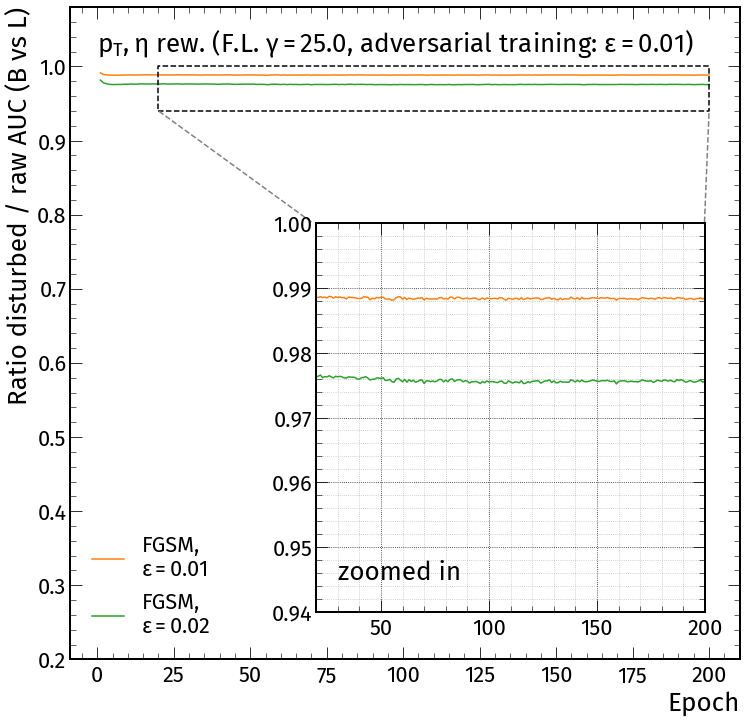

17207

In [105]:
plt.figure(5,[12,12])
plt.xlabel('Epoch')
plt.ylabel('Ratio disturbed / raw AUC (B vs L)')
#plt.plot(at_epoch,adv['BvL_raw'],label='Raw')
plt.plot([],[])
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,adv['BvL_eps0.01']/basic['BvL_raw'],label=f'FGSM,\n$\epsilon={s}$')
    else:
        plt.plot(at_epoch,adv['BvL_eps0.02']/basic['BvL_raw'],label=f'FGSM,\n$\epsilon={s}$')
plt.legend()
#plt.xlim([20,120])
plt.ylim([0.2,1.08])
plt.text(0,1.02,r'$p_T, \eta$ rew. (F.L. $\gamma=$'+f'25.0, adversarial training: $\epsilon=$'+f'0.01)')
plt.plot([20,200,200,20,20],[0.94,0.94,1,1,0.94],'--',color='black')
plt.plot([70,20],[0.79,0.94],'--',color='grey')
plt.plot([198.5,200],[0.79,0.94],'--',color='grey')
ax = plt.axes([.41, .18, .45, .45])
#plt.plot(at_epoch,adv['BvL_raw'],label='Raw')
plt.plot([],[])
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,adv['BvL_eps0.01']/basic['BvL_raw'],label=f'FGSM,\n$\epsilon={s}$')
    else:
        plt.plot(at_epoch,adv['BvL_eps0.02']/basic['BvL_raw'],label=f'FGSM,\n$\epsilon={s}$')
plt.xlim([20,200])
plt.ylim([0.94,1])
plt.text(30,0.945,'zoomed in')

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
plt.savefig(f'auc/BvL/adv_auc_ratio_fgsm_001_002.svg', bbox_inches='tight')
plt.savefig(f'auc/BvL/adv_auc_ratio_fgsm_001_002.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)

### Noise

### Basic

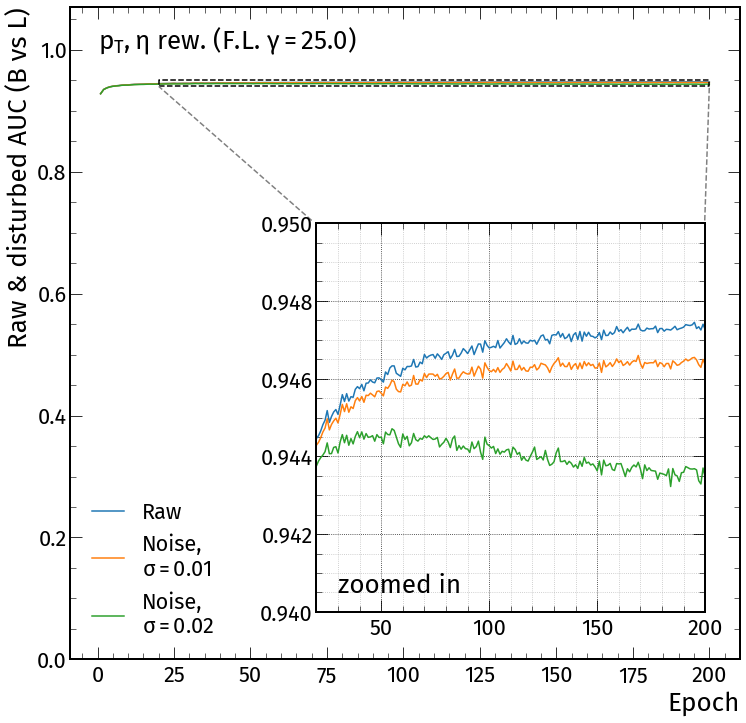

15495

In [119]:
plt.figure(5,[12,12])
plt.xlabel('Epoch')
plt.ylabel('Raw & disturbed AUC (B vs L)')
plt.plot(at_epoch,basic['BvL_raw'],label='Raw')
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,basic['BvL_sigma0.01'],label=f'Noise,\n$\sigma={s}$')
    else:
        plt.plot(at_epoch,basic['BvL_sigma0.02'],label=f'Noise,\n$\sigma={s}$')
plt.legend()
#plt.xlim([20,120])
plt.ylim([0.0,1.07])
plt.text(0,1,r'$p_T, \eta$ rew. (F.L. $\gamma=$'+f'25.0)')
plt.plot([20,200,200,20,20],[0.94,0.94,0.95,0.95,0.94],'--',color='black')
plt.plot([70,20],[0.72,0.94],'--',color='grey')
plt.plot([198.5,200],[0.72,0.94],'--',color='grey')
ax = plt.axes([.41, .18, .45, .45])
plt.plot(at_epoch,basic['BvL_raw'],label='Raw')
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,basic['BvL_sigma0.01'],label=f'Noise,\n$\sigma={s}$')
    else:
        plt.plot(at_epoch,basic['BvL_sigma0.02'],label=f'Noise,\n$\sigma={s}$')
plt.xlim([20,200])
plt.ylim([0.94,0.95])
plt.text(30,0.9405,'zoomed in')

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
plt.savefig(f'auc/BvL/basic_auc_Noise_001_002.svg', bbox_inches='tight')
plt.savefig(f'auc/BvL/basic_auc_Noise_001_002.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)

### Adversarial

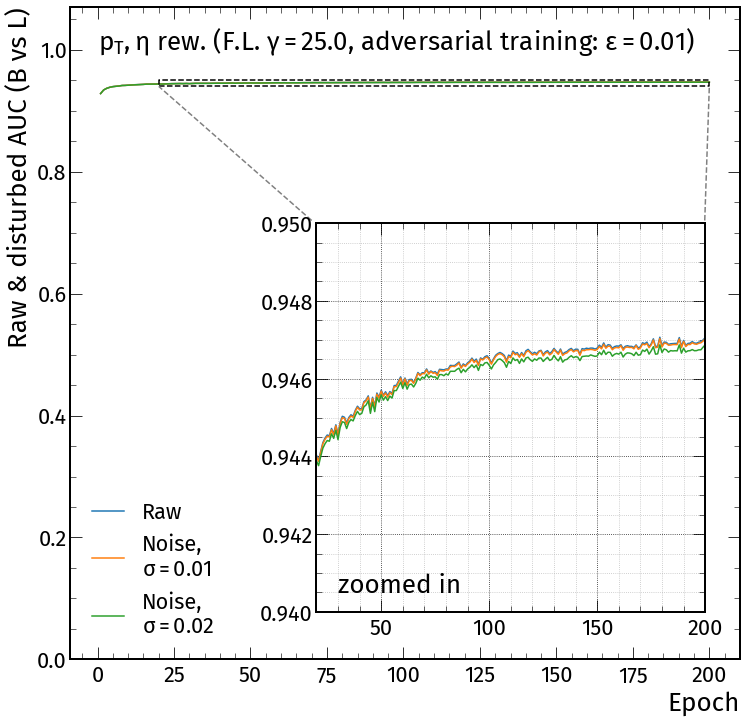

15199

In [120]:
plt.figure(5,[12,12])
plt.xlabel('Epoch')
plt.ylabel('Raw & disturbed AUC (B vs L)')
plt.plot(at_epoch,adv['BvL_raw'],label='Raw')
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,adv['BvL_sigma0.01'],label=f'Noise,\n$\sigma={s}$')
    else:
        plt.plot(at_epoch,adv['BvL_sigma0.02'],label=f'Noise,\n$\sigma={s}$')
plt.legend()
#plt.xlim([20,120])
plt.ylim([0.0,1.07])
plt.text(0,1,r'$p_T, \eta$ rew. (F.L. $\gamma=$'+f'25.0, adversarial training: $\epsilon=$'+f'0.01)')
plt.plot([20,200,200,20,20],[0.94,0.94,0.95,0.95,0.94],'--',color='black')
plt.plot([70,20],[0.72,0.94],'--',color='grey')
plt.plot([198.5,200],[0.72,0.94],'--',color='grey')
ax = plt.axes([.41, .18, .45, .45])
plt.plot(at_epoch,adv['BvL_raw'],label='Raw')
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,adv['BvL_sigma0.01'],label=f'Noise,\n$\sigma={s}$')
    else:
        plt.plot(at_epoch,adv['BvL_sigma0.02'],label=f'Noise,\n$\sigma={s}$')
plt.xlim([20,200])
plt.ylim([0.94,0.95])
plt.text(30,0.9405,'zoomed in')

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
plt.savefig(f'auc/BvL/adv_auc_Noise_001_002.svg', bbox_inches='tight')
plt.savefig(f'auc/BvL/adv_auc_Noise_001_002.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)

### Ratios

### Basic

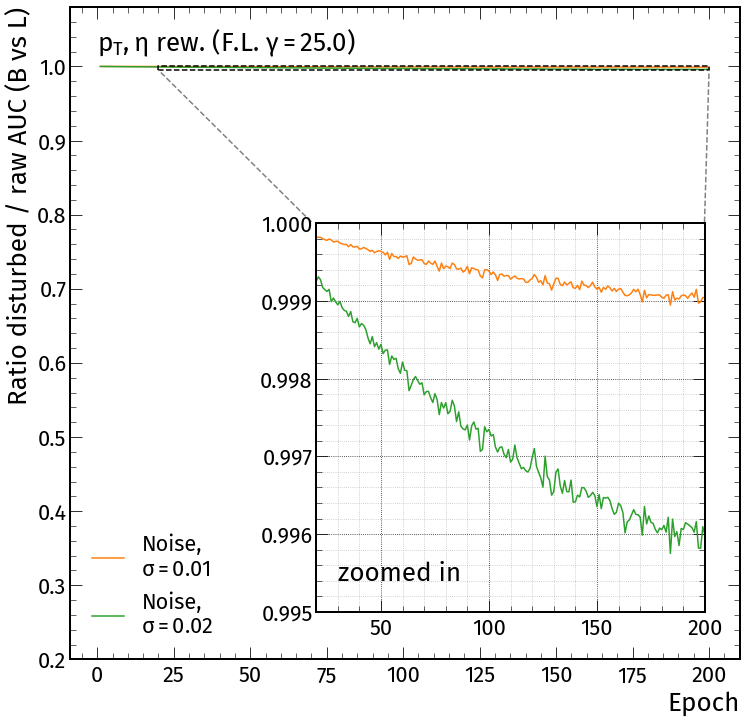

16218

In [123]:
plt.figure(5,[12,12])
plt.xlabel('Epoch')
plt.ylabel('Ratio disturbed / raw AUC (B vs L)')
#plt.plot(at_epoch,basic['BvL_raw'],label='Raw')
plt.plot([],[])
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,basic['BvL_sigma0.01']/basic['BvL_raw'],label=f'Noise,\n$\sigma={s}$')
    else:
        plt.plot(at_epoch,basic['BvL_sigma0.02']/basic['BvL_raw'],label=f'Noise,\n$\sigma={s}$')
plt.legend()
#plt.xlim([20,120])
plt.ylim([0.2,1.08])
plt.text(0,1.02,r'$p_T, \eta$ rew. (F.L. $\gamma=$'+f'25.0)')
plt.plot([20,200,200,20,20],[0.995,0.995,1,1,0.995],'--',color='black')
plt.plot([70,20],[0.79,0.995],'--',color='grey')
plt.plot([198.5,200],[0.79,0.995],'--',color='grey')
ax = plt.axes([.41, .18, .45, .45])
#plt.plot(at_epoch,basic['BvL_raw'],label='Raw')
plt.plot([],[])
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,basic['BvL_sigma0.01']/basic['BvL_raw'],label=f'Noise,\n$\sigma={s}$')
    else:
        plt.plot(at_epoch,basic['BvL_sigma0.02']/basic['BvL_raw'],label=f'Noise,\n$\sigma={s}$')
plt.xlim([20,200])
plt.ylim([0.995,1])
plt.text(30,0.9954,'zoomed in')

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
plt.savefig(f'auc/BvL/basic_auc_ratio_Noise_001_002.svg', bbox_inches='tight')
plt.savefig(f'auc/BvL/basic_auc_ratio_Noise_001_002.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)

### Adversarial

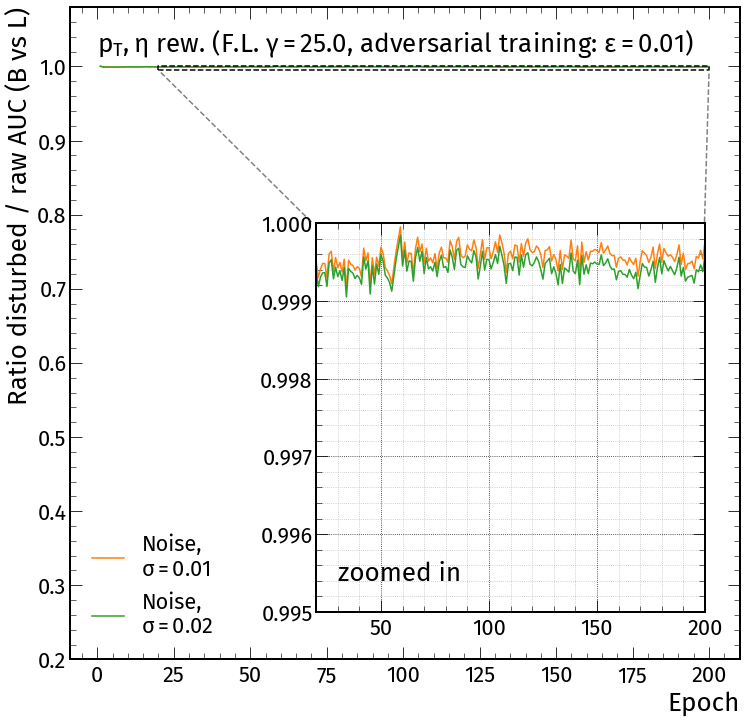

17224

In [124]:
plt.figure(5,[12,12])
plt.xlabel('Epoch')
plt.ylabel('Ratio disturbed / raw AUC (B vs L)')
#plt.plot(at_epoch,adv['BvL_raw'],label='Raw')
plt.plot([],[])
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,adv['BvL_sigma0.01']/basic['BvL_raw'],label=f'Noise,\n$\sigma={s}$')
    else:
        plt.plot(at_epoch,adv['BvL_sigma0.02']/basic['BvL_raw'],label=f'Noise,\n$\sigma={s}$')
plt.legend()
#plt.xlim([20,120])
plt.ylim([0.2,1.08])
plt.text(0,1.02,r'$p_T, \eta$ rew. (F.L. $\gamma=$'+f'25.0, adversarial training: $\epsilon=$'+f'0.01)')
plt.plot([20,200,200,20,20],[0.995,0.995,1,1,0.995],'--',color='black')
plt.plot([70,20],[0.79,0.995],'--',color='grey')
plt.plot([198.5,200],[0.79,0.995],'--',color='grey')
ax = plt.axes([.41, .18, .45, .45])
#plt.plot(at_epoch,adv['BvL_raw'],label='Raw')
plt.plot([],[])
for i, s in enumerate(epsilons):
    if s == 0.01:
        plt.plot(at_epoch,adv['BvL_sigma0.01']/basic['BvL_raw'],label=f'Noise,\n$\sigma={s}$')
    else:
        plt.plot(at_epoch,adv['BvL_sigma0.02']/basic['BvL_raw'],label=f'Noise,\n$\sigma={s}$')
plt.xlim([20,200])
plt.ylim([0.995,1])
plt.text(30,0.9954,'zoomed in')

ax.grid(which='minor', alpha=0.85)
ax.grid(which='major', alpha=0.95, color='black')
plt.savefig(f'auc/BvL/adv_auc_ratio_Noise_001_002.svg', bbox_inches='tight')
plt.savefig(f'auc/BvL/adv_auc_ratio_Noise_001_002.pdf', bbox_inches='tight')
plt.show(block=False)
time.sleep(5)
plt.close('all')
gc.collect(2)

### Downloading all at once

In [1]:
!tar czf auc_BvL_pdf.tar.gz auc/BvL/*.pdf

In [2]:
!tar czf auc_BvL_svg.tar.gz auc/BvL/*.svg